# EDA of the Toyota Used Cars Dataset from Kaggle
<br>

### Author: Tasnim Ara Islam

#### Objectives:
1. Choose one dataset (audi, ford, hyundai, toyota, skoda, vw) from this link: https://github.com/SKawsar/Data_Visualization_with_Python

Original data source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw
<br>

2. EDA using groupby/pivot_table and barplot (total 9 barplots), based on model, transmission, and fuelType,
    
    A. What are the top 5 selling car models/transmission/fuelType in the dataset?
    
    B. What's the average selling price of the top 5 selling car models/transmission/fuelType?
    
    C. What's the total sale of the top 5 selling car models/transmission/fuelType?

#### Importing Libraries

In [80]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

#### Load data

In [81]:
df = pd.read_csv("toyota.csv")
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


### EDA using groupby based on "model"

#### check the number of unique values in the 'model' column

In [82]:
print(df['model'].unique())

[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']


#### Data Aggregation

In [83]:
df_agg_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_model)

,count,mean,sum
model,,,
Auris,712,12507.911517,8905633
Avensis,115,9884.356522,1136701
Aygo,1961,7905.414584,15502518
C-HR,479,20651.540710,9892088
Camry,11,26910.090909,296011
Corolla,267,20942.734082,5591710
GT86,73,19908.849315,1453346
Hilux,86,21504.593023,1849395
IQ,8,4247.250000,33978


#### Data preprocessing before visualization

In [84]:
# sort the dataframe based on the column 'count'
df_agg_model = df_agg_model.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_model['percent_of_cars'] = (df_agg_model['count']/df_agg_model['count'].sum())*100

# convert the 'sum' column in millions
df_agg_model['sum'] = df_agg_model['sum']/1000000

# keep up to two decimal points
df_agg_model = df_agg_model.round(2)

# remove the 'count' column
df_agg_model = df_agg_model.drop('count', axis=1)

display(df_agg_model.head())

,mean,sum,percent_of_cars
model,,,
Yaris,10553.08,22.39,31.49
Aygo,7905.41,15.50,29.10
Auris,12507.91,8.91,10.57
C-HR,20651.54,9.89,7.11
RAV4,18161.06,8.59,7.02


#### Barplot: Percentage of cars, Average and Total selling price of cars by model
#### Questions in mind: Based on model, 

- What are the top 5 selling car models in the dataset?
- What's the average selling price of the top 5 selling car models?
- What's the total sale of the top 5 selling car models?

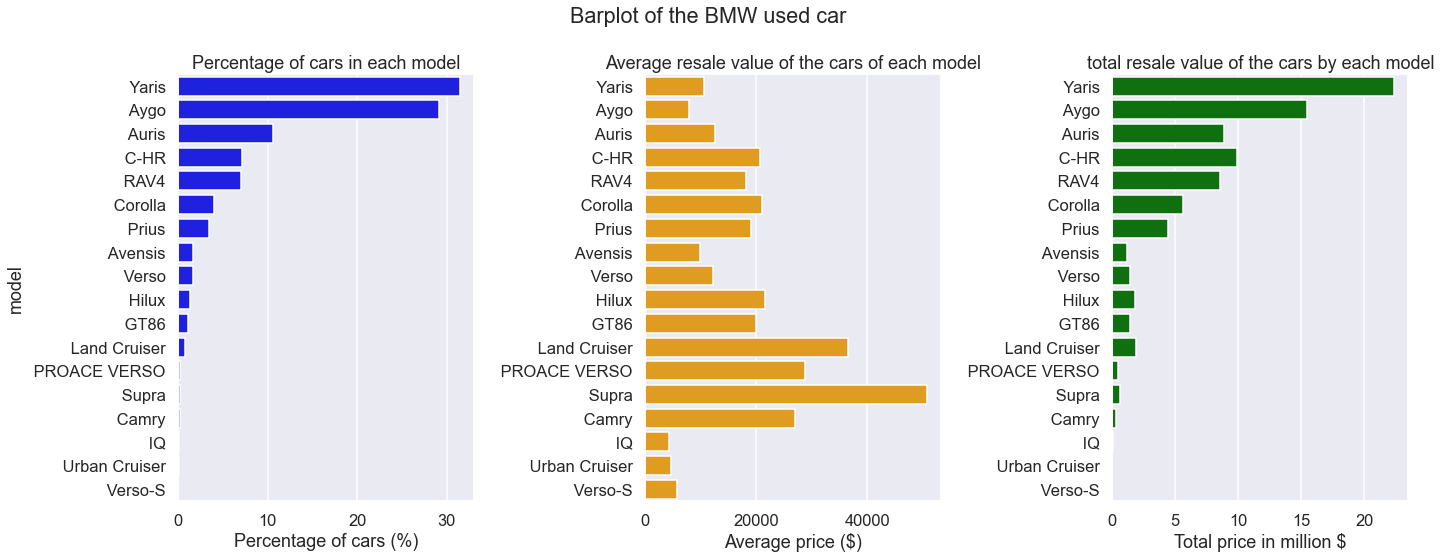

In [85]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the BMW used car")
plt.tight_layout()
plt.show()

### EDA using groupby based on "transmission"

#### check the number of unique values in the 'transmission' column

In [86]:
print(df['transmission'].unique())

['Manual' 'Automatic' 'Semi-Auto' 'Other']


#### Data Aggregation

In [87]:
df_agg_transmission = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_transmission)

,count,mean,sum
transmission,,,
Automatic,2657,16582.828754,44060576
Manual,3826,9551.496864,36544027
Other,1,12795.000000,12795
Semi-Auto,254,14797.137795,3758473


#### Data preprocessing before visualization

In [88]:
# sort the dataframe based on the column 'count'
df_agg_transmission = df_agg_transmission.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_transmission['percent_of_cars'] = (df_agg_transmission['count']/df_agg_transmission['count'].sum())*100

# convert the 'sum' column in millions
df_agg_transmission['sum'] = df_agg_transmission['sum']/1000000

# keep up to two decimal points
df_agg_transmission = df_agg_transmission.round(2)

# remove the 'count' column
df_agg_transmission = df_agg_transmission.drop('count', axis=1)

display(df_agg_transmission.head())

,mean,sum,percent_of_cars
transmission,,,
Manual,9551.50,36.54,56.78
Automatic,16582.83,44.06,39.43
Semi-Auto,14797.14,3.76,3.77
Other,12795.00,0.01,0.01


#### Barplot: Percentage of cars, Average and Total selling price of cars by transmission
#### Questions in mind: Based on transmission,

- What are the top 5 selling car models in the dataset?
- What's the average selling price of the top 5 selling car models?
- What's the total sale of the top 5 selling car models?

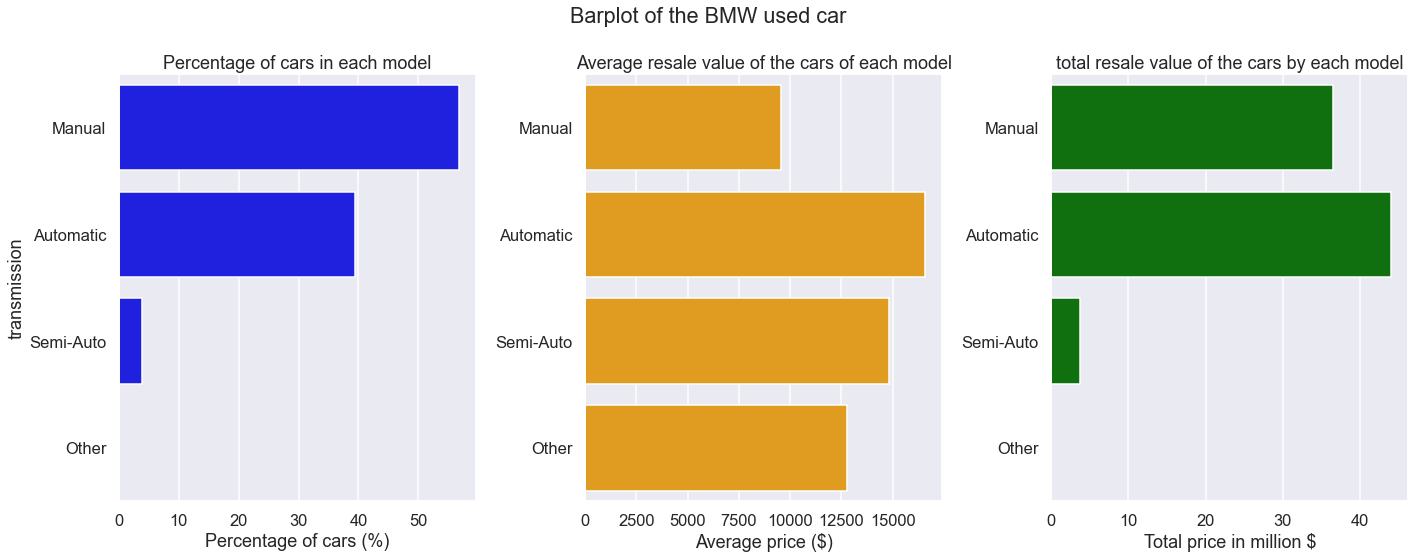

In [89]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the BMW used car")
plt.tight_layout()
plt.show()

### EDA using groupby based on "fuelType"

#### check the number of unique values in the 'fuelType' column

In [90]:
print(df['fuelType'].unique())

['Petrol' 'Other' 'Hybrid' 'Diesel']


#### Data Aggregation

In [91]:
df_agg_fuelType = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_fuelType)

,count,mean,sum
fuelType,,,
Diesel,503,15697.807157,7895997
Hybrid,2043,17185.472834,35109921
Other,105,14121.161905,1482722
Petrol,4087,9759.537803,39887231


#### Data preprocessing before visualization

In [92]:
# sort the dataframe based on the column 'count'
df_agg_fuelType = df_agg_fuelType.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_fuelType['percent_of_cars'] = (df_agg_fuelType['count']/df_agg_fuelType['count'].sum())*100

# convert the 'sum' column in millions
df_agg_fuelType['sum'] = df_agg_fuelType['sum']/1000000

# keep up to two decimal points
df_agg_fuelType = df_agg_fuelType.round(2)

# remove the 'count' column
df_agg_fuelType = df_agg_fuelType.drop('count', axis=1)

display(df_agg_fuelType.head())

,mean,sum,percent_of_cars
fuelType,,,
Petrol,9759.54,39.89,60.66
Hybrid,17185.47,35.11,30.32
Diesel,15697.81,7.90,7.47
Other,14121.16,1.48,1.56


#### Barplot: Percentage of cars, Average and Total selling price of cars by fuelType
#### Questions in mind: Based on fuelType,

- What are the top 5 selling car models in the dataset?
- What's the average selling price of the top 5 selling car models?
- What's the total sale of the top 5 selling car models?

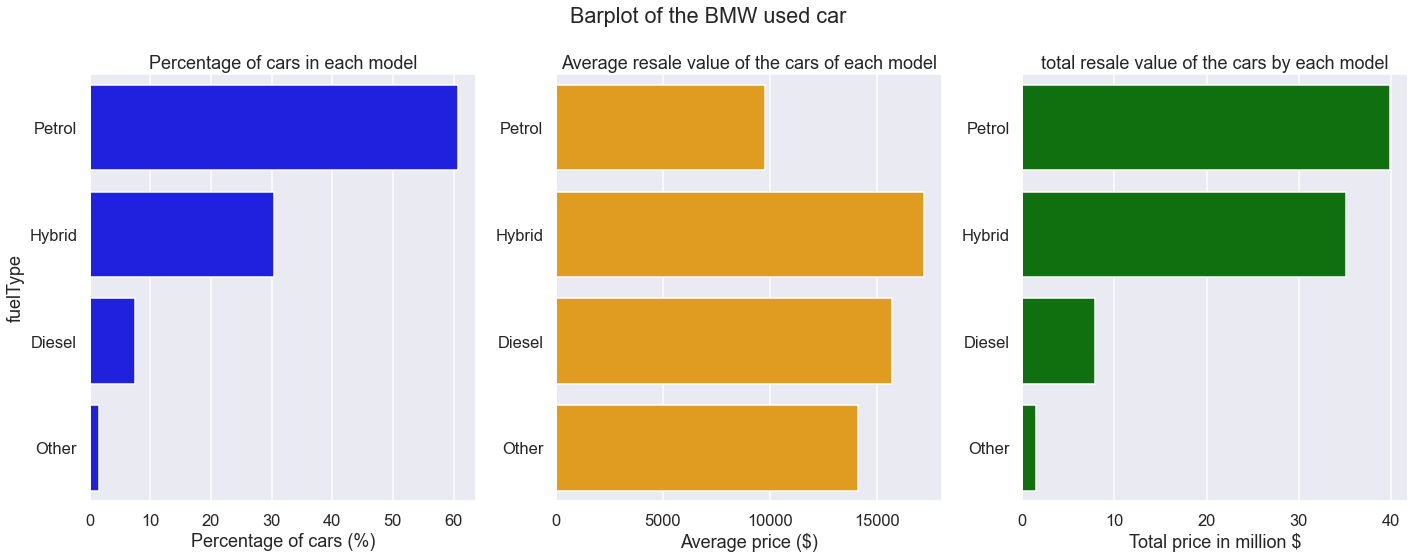

In [93]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the BMW used car")
plt.tight_layout()
plt.show()